## Homework 02: FUNDAMENTALS OF ML AND STATISTICAL LEARNING

### 1. Metadata  
Food Order Cost and Profit Analysis 

- **Order ID**: int.
- **Customer ID**: text.  
- **Restaurant ID**: text. 
- **Order Date and Time**: date and time.
- **Delivery Date and Time**: date and time. 
- **Order Value**: int.  
- **Delivery Fee**: int.  
- **Payment Method**: text.  
- **Discounts and Offers**: text.  
- **Commission Fee**: int.  
- **Payment Processing Fee**: int.  
- **Refunds/Chargebacks**: int.

In [4]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from scipy.stats import norm
from scipy import stats

In [1]:
# Define the column names as a list
column_names = ['Order ID', 'Customer ID', 'Restaurant ID', 'Order Date and Time', 'Delivery Date and Time', 'Order Value',
                'Delivery Fee', 'Payment Method', 'Discounts and Offers', 'Commission Fee', 'Payment Processing Fee',
                'Refunds/Chargebacks']

### 2. Load Dataset

In [5]:
dataset = pd.read_csv("dataset/food_orders.csv", names = column_names, sep = ",", skipinitialspace=True)
dataset.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
1,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
2,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
3,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
4,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0


In [6]:
# print important information about dataset
print("#Total of samples = ", dataset.shape[0])
print("#Features = ", dataset.shape[1])

#Total of samples =  1001
#Features =  12


In [7]:
# checking the missing values
dataset[dataset.eq("?").any(axis=1)].head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks


In [8]:
# replace data with '?' by NaN
dataset.replace("?", np.nan, inplace=True)
dataset[dataset.isna().any(axis=1)].head()
print("#Samples with missing values = ", len(dataset[dataset.isna().any(axis=1)]))

#Samples with missing values =  185


Filtering missing values

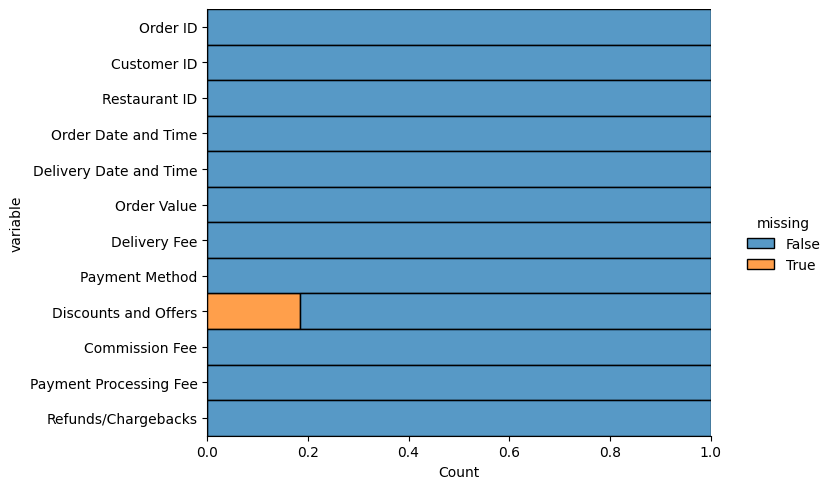

In [9]:
# plot missing data
sbn.displot(
    data = dataset.isna().melt(value_name="missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    aspect = 1.5
)

plt.show()

This graph shows that there are missing values ​​in the column Discounts and Offers

In [10]:
dataset = dataset.dropna()
print("#Total samples without missing values = ", len(dataset))

#Total samples without missing values =  816


### 3. Descriptive Statistical Analysis

#### Numerical variables

In [12]:
# list of numerical variables
numerical_cols = ['Order Value', 'Delivery Fee', 'Commission Fee', 'Payment Processing Fee', 'Refunds/Chargebacks']

# converting columns to numeric format and replacing unadjusted data with NaN
for col in numerical_cols:
    dataset[col] = pd.to_numeric(dataset[col], errors='coerce')

# delete strings with NaN
dataset = dataset.dropna()

Histogram with Frequencies

In [13]:
# function to plot distribution for 1 numerical column
def hist_frequencies(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins)
    plt.xlabel(column)
    plt.ylabel("Frequencies")
    plt.title("Histogram distribution for " + column)
    plt.show()

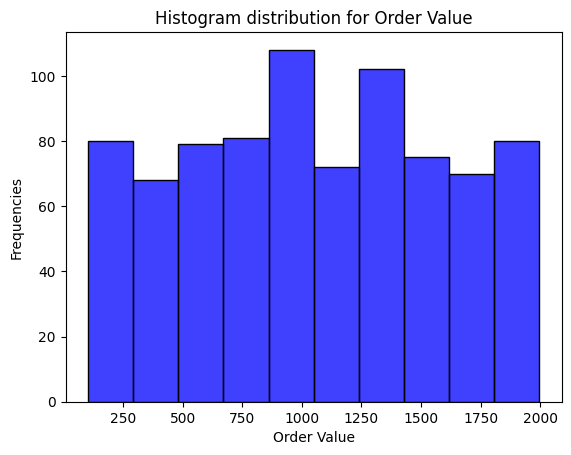

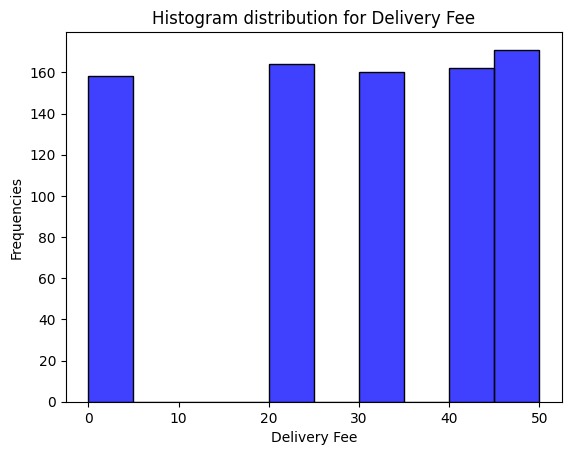

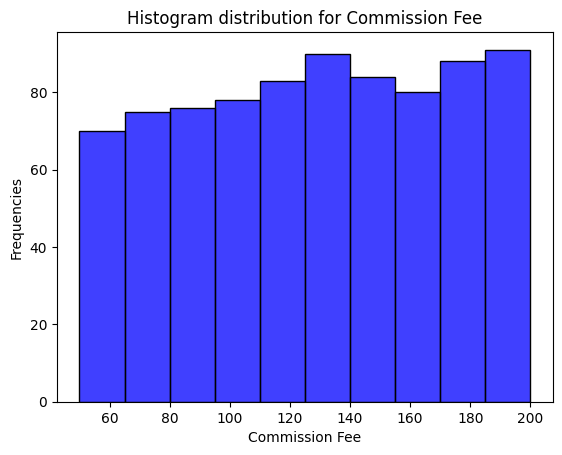

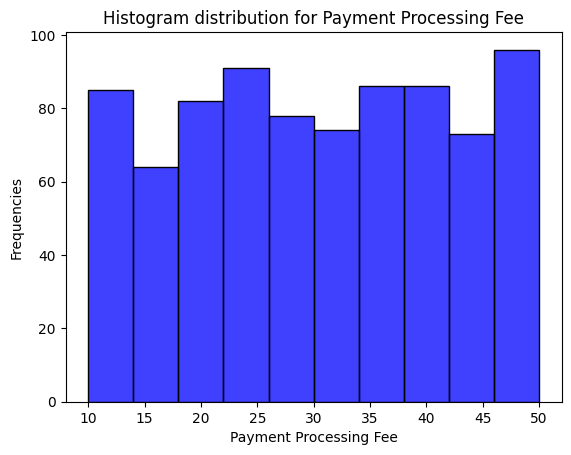

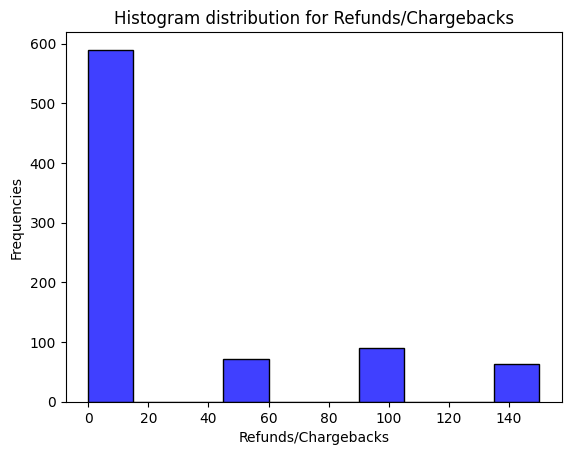

In [14]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_frequencies(dataset, col, 10)

These plots show the values ​​of the column values ​​of a set of dates. How many fields with objects and values.

Histogram with Densities and KDE line (kernel density estimate)

The Kernel Density Estimator provides a smooth curve that represents the distribution of data points based on estimating the probability density function of a random variable:  
$$ \hat{f}(x; h) = \frac{1}{n} \sum_{i=1}^{n} K_h(x - X_i) $$  
Where:  
* n: total number of data points
* $X_i$: observed data points
* $K_h$: kernel function scaled by the bandwidth h
$$ K_h(z) = \frac{1}{h} K\left(\frac{z}{h}\right) $$ 
* $K$: Gaussian Kernel  
$$ K(x) = \frac{1}{\sqrt{2\pi}} e^{-\frac{x^2}{2}} $$

In [15]:
# function to plot distribution for 1 numerical column
def hist_density(data, column, bins):
    sbn.histplot(data[column], color = "blue", bins = bins, kde = False, stat = "density", alpha = 0.5)
    sbn.kdeplot(data[column], color = "red", linewidth = 2)
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.title("Histogram and KDE for " + column)
    plt.show()

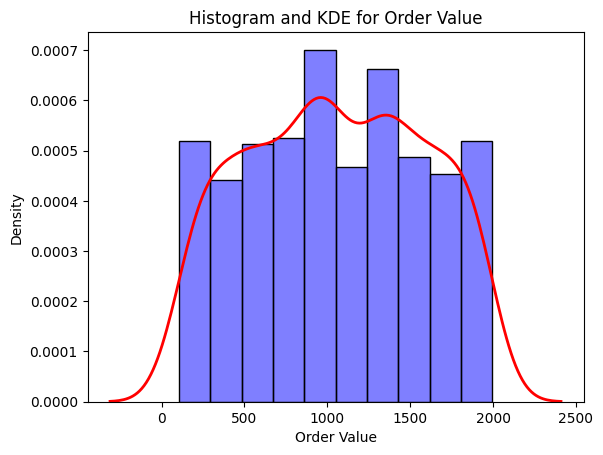

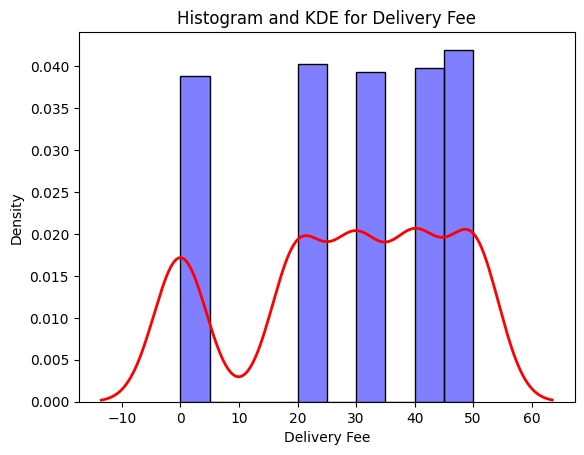

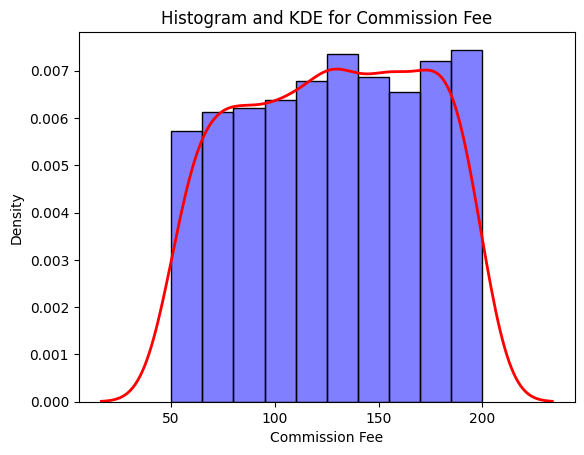

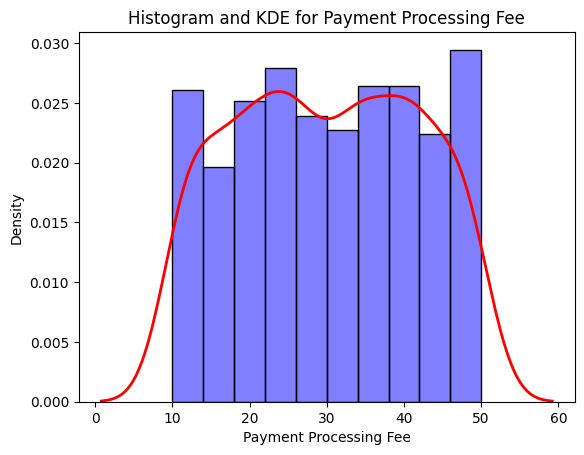

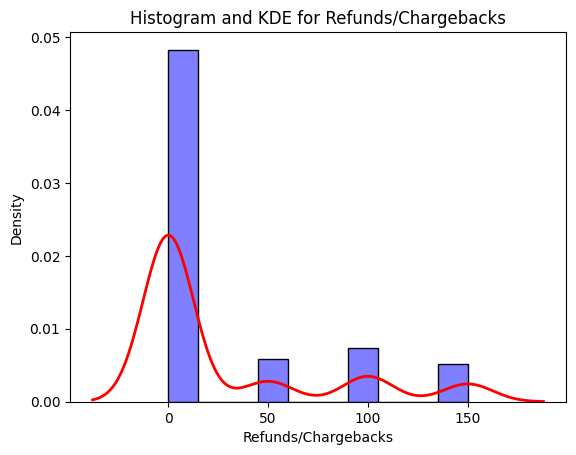

In [16]:
# plot the distribution for each numerical column
for col in numerical_cols:
    hist_density(dataset, col, 10)

Represent the transmission of data points based on an estimate of the probability density function of a random variable.

Box Plot

In [17]:
# function to make boxplot
def statistics_nvar(data, numerical_cols):
    # calculate the nrows and ncols for plots
    ncol_plots = 3
    nrow_plots = (len(numerical_cols) + ncol_plots - 1) // ncol_plots
    # create the subplots for specific row and column
    fig, axs = plt.subplots(nrow_plots, ncol_plots, figsize = (16, 4 * nrow_plots))
    axs = axs.flatten()
    # create boxplots for each numerical column
    for i, col in enumerate(numerical_cols):
        sbn.boxplot(data[col], ax = axs[i])
        axs[i].set_title("Box plot for " + col)
    plt.tight_layout()
    plt.show()

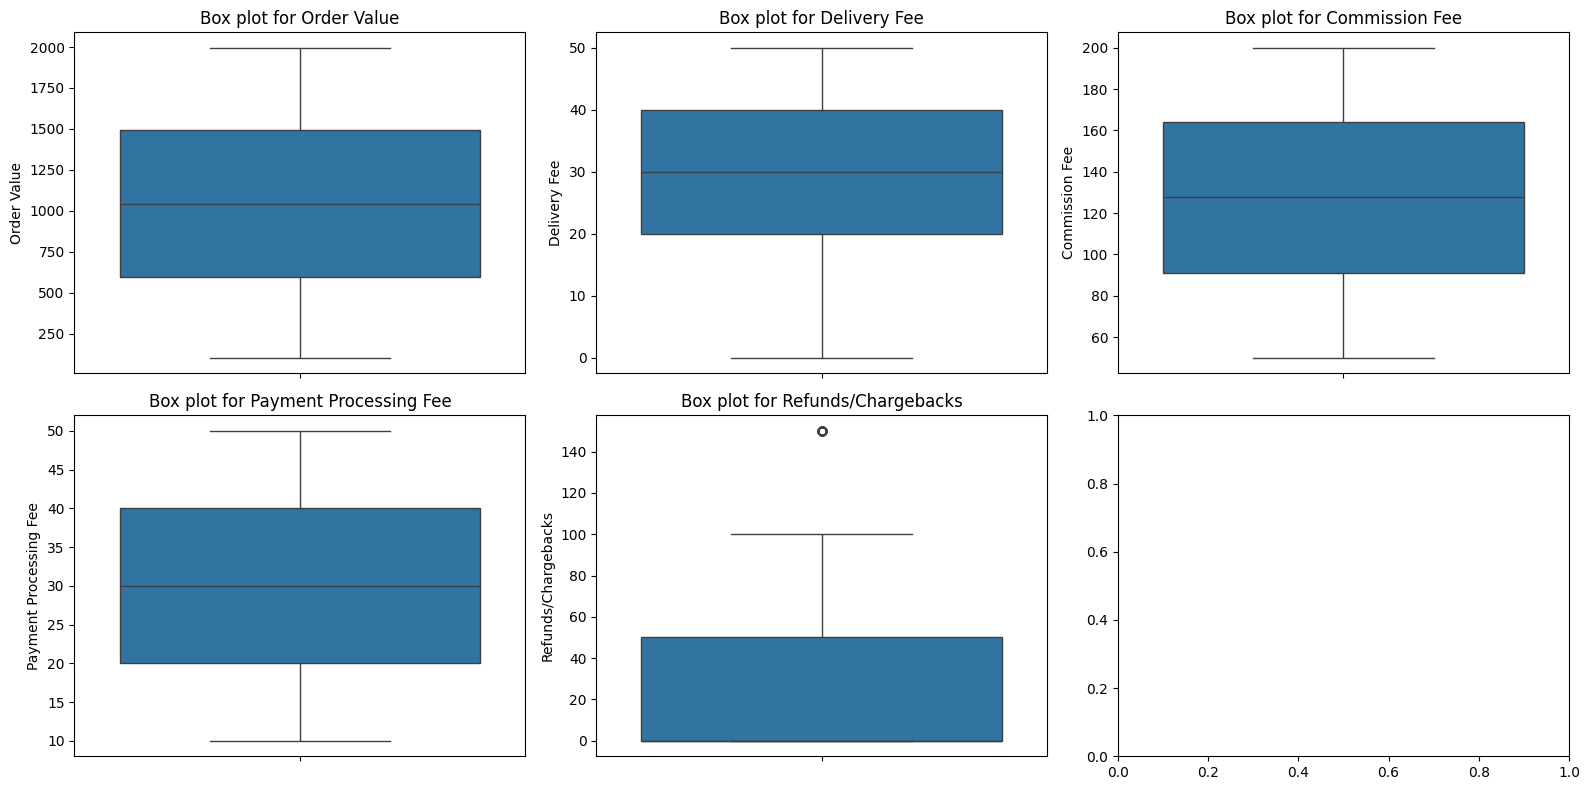

In [18]:
# boxplot for each numerical column
statistics_nvar(dataset, numerical_cols)

This graph shows the median (the average value of the data) and the 25th and 75th quartiles, which show where the middle 50% of the data lies.

Statistical metrics

In [19]:
# statistical information about numerical variables
dataset[numerical_cols].describe()

,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,815.000000,815.000000,815.000000,815.000000,815.000000
mean,1055.352147,28.355828,127.359509,29.906748,27.055215
std,528.574689,17.206536,42.827545,11.726663,48.324920
min,104.000000,0.000000,50.000000,10.000000,0.000000
25%,598.500000,20.000000,91.000000,20.000000,0.000000
50%,1039.000000,30.000000,128.000000,30.000000,0.000000
75%,1496.000000,40.000000,164.000000,40.000000,50.000000
max,1995.000000,50.000000,200.000000,50.000000,150.000000


Correlation Analysis

The correlation between 2 variables quantify the linear relationship between the variables X and Y:  
$$ r = \frac{\text{Cov}(X, Y)}{\sigma_X \sigma_Y} $$   
Where:  
  
$r$: pearson correlation coefficient  
$Cov(x, y)$: covariance between variables X and Y. It measures how much the two variables change together.  
$\sigma_X, \sigma_Y$: standard deviations for variables X and Y.  

Formula of Covariance:  
$$ \text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y}) $$  
Formula for standard deviation for X:  
$$ \sigma_X = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2} $$  
Formula for standard deviation for Y:  
$$ \sigma_Y = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (Y_i - \bar{Y})^2} $$  

In [21]:
# function to plot correlation between numerical variables
def plot_correlation(data, cols):
    corr = data[cols].corr()
    plt.matshow(corr, cmap = "coolwarm")
    plt.xticks(range(len(cols)), cols, rotation = 90)
    plt.yticks(range(len(cols)), cols)

    # add the correlation values in each cell
    for (i, j), val in np.ndenumerate(corr):
        plt.text(j, i, f"{val:.1f}", ha='center', va='center', color='black')
    plt.title("Correlation Analysis")
    plt.colorbar()
    plt.show()

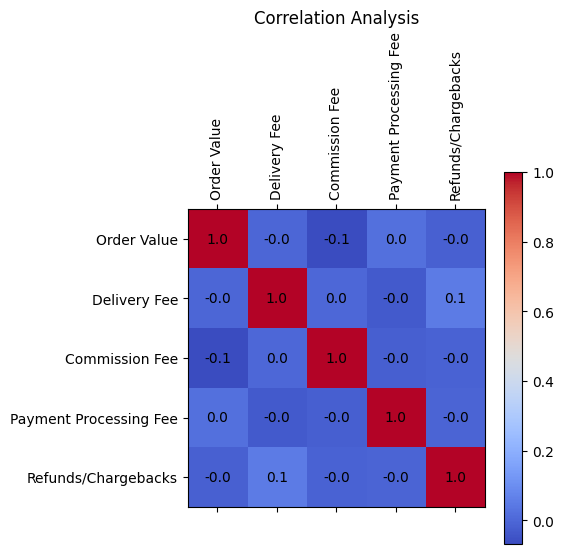

In [22]:
plot_correlation(dataset, numerical_cols)


This graph measures the degree of linear relationship between variables.

Implications of Low Correlation

- **Independence of Features**:  
Low correlation suggests that the features are likely independent of each other. 
This can be beneficial because independent features provide unique information to the model, which can improve its performance.
- **Feature Redundancy**:   
When features are not correlated, it reduces the risk of redundancy. 
Including redundant features (highly correlated) can lead to issues like multicollinearity, making it difficult to interpret the model and possibly degrading its performance.
- **Model Complexity**:  
Low correlation may indicate that the model needs to learn more complex relationships to make accurate predictions. 
If features do not provide overlapping information, the model may require more sophisticated techniques (like polynomial regression or interaction terms) to capture the underlying patterns.
- **Feature Selection**:  
In some cases, low-correlation features might be candidates for removal if they do not contribute significantly to the predictive power of the model. 

**Outliers detection using Z-Score**  
The Z-score is the number of standard deviations from the mean that a data point is.  
The formula for the Z-score is:  
$$ Z = \frac{x - \mu}{\sigma} $$

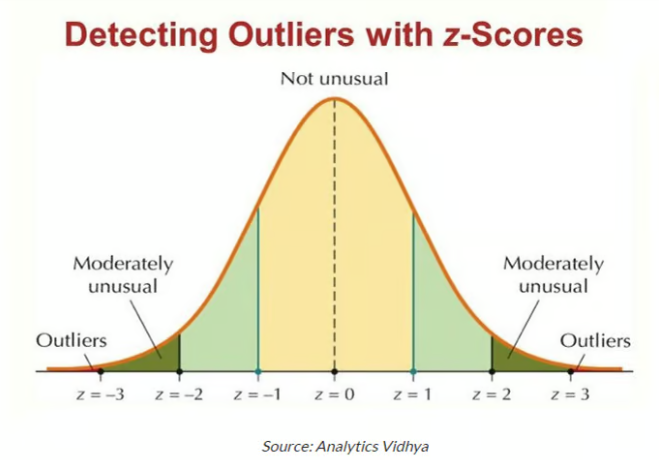

In [23]:
# function to plot gaussian kernel
def plot_gaussian_kernel(mean=0, std_dev=1, num_points=1000):
    # Generate x values
    x = np.linspace(mean - 4 * std_dev, mean + 4 * std_dev, num_points)

    # Calculate the Gaussian kernel values
    gaussian_kernel = (1 / (np.sqrt(2 * np.pi) * std_dev)) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(x, gaussian_kernel, color='blue', label=f'Gaussian Kernel\nMean = {mean}, Std Dev = {std_dev}')
    plt.title('Gaussian Kernel')
    plt.xlabel('x')
    plt.ylabel('Probability Density')
    plt.axvline(mean, color='red', linestyle='--', label='Mean')
    plt.legend()
    plt.grid()
    plt.show()

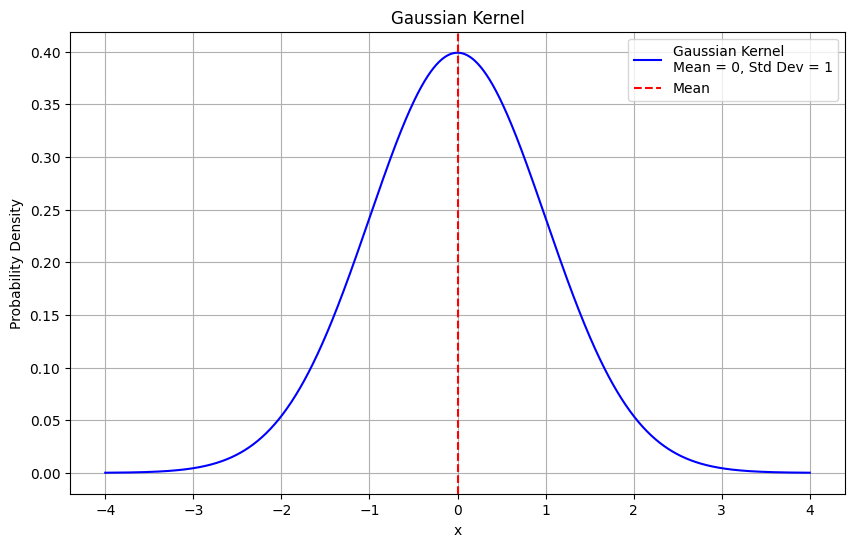

In [24]:
# standard gaussian kernel
plot_gaussian_kernel(mean=0, std_dev=1)


This graph shows a Gaussian probability density function that is symmetrical around the mean, which is represented by the red vertical line.

In [27]:
# Calculate the percentile for a specific Z-score
def call_percentile(z):
    percentile = float(round(norm.cdf(z) * 100, 3))
    return percentile


In [28]:
call_percentile(z = -2)

2.275

In [29]:
# Function for outliers detection based on percentiles
def outliers_detection(dataset, col, lower_percentile=2.275, upper_percentile=97.725):
    # Calculate the percentiles
    lower_bound = dataset[col].quantile(lower_percentile / 100)
    upper_bound = dataset[col].quantile(upper_percentile / 100)
    
    # Filter out the outliers
    outliers = dataset[(dataset[col] < lower_bound) | (dataset[col] > upper_bound)]
    
    return outliers

In [31]:
outliers_detection(dataset, 'Order Value').head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
5,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992.0,30.0,Cash on Delivery,50 off Promo,130.0,50.0,0.0
24,24,C8849,R2834,2024-02-07 16:46:21,2024-02-07 18:24:21,1937.0,20.0,Credit Card,5% on App,76.0,46.0,0.0
192,192,C3511,R2186,2024-01-09 15:36:59,2024-01-09 17:28:59,112.0,30.0,Credit Card,5% on App,88.0,16.0,0.0
194,194,C3811,R2743,2024-01-15 09:39:40,2024-01-15 10:23:40,1957.0,30.0,Credit Card,50 off Promo,105.0,22.0,0.0
198,198,C9338,R2054,2024-01-28 13:22:12,2024-01-28 15:08:12,1957.0,20.0,Credit Card,10%,167.0,30.0,0.0


In [32]:
# cycle to check the number of outliers in each numerical column
for col in numerical_cols:
    print("\n*** Outliers detection in " + col + " ***")
    lst_outliers = outliers_detection(dataset, col)
    print(f"#samples outlier to distribution = {len(lst_outliers)}")
    print(f"%outliers = {round(100* len(lst_outliers)/len(dataset), 2)} %")


*** Outliers detection in Order Value ***
#samples outlier to distribution = 38
%outliers = 4.66 %

*** Outliers detection in Delivery Fee ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in Commission Fee ***
#samples outlier to distribution = 37
%outliers = 4.54 %

*** Outliers detection in Payment Processing Fee ***
#samples outlier to distribution = 0
%outliers = 0.0 %

*** Outliers detection in Refunds/Chargebacks ***
#samples outlier to distribution = 0
%outliers = 0.0 %


#### Categorical Variables

In [35]:
# list of categorical variables
categorical_vars = list(set(dataset.columns) - set(numerical_cols) - {'Order ID', 'Restaurant ID', 'Customer ID'})

Count instances for each categorical column

In [37]:
# cycle to calculate number of instances in each categorical column
for col in categorical_vars:
    print("\n***** " + col + " ******")
    print(dataset[col].value_counts())


***** Payment Method ******
Payment Method
Cash on Delivery    292
Credit Card         274
Digital Wallet      249
Name: count, dtype: int64

***** Order Date and Time ******
Order Date and Time
2024-01-08 14:46:43    1
2024-02-01 01:11:52    1
2024-02-02 22:11:04    1
2024-01-31 05:54:35    1
2024-01-29 01:19:30    1
                      ..
2024-02-07 16:46:21    1
2024-01-05 10:18:49    1
2024-01-27 14:44:44    1
2024-01-13 01:32:57    1
2024-01-31 17:27:17    1
Name: count, Length: 815, dtype: int64

***** Delivery Date and Time ******
Delivery Date and Time
2024-01-08 15:39:43    1
2024-02-01 02:39:52    1
2024-02-02 22:46:04    1
2024-01-31 06:52:35    1
2024-01-29 02:48:30    1
                      ..
2024-02-07 18:24:21    1
2024-01-05 11:07:49    1
2024-01-27 16:35:44    1
2024-01-13 02:22:57    1
2024-01-31 18:53:17    1
Name: count, Length: 815, dtype: int64

***** Discounts and Offers ******
Discounts and Offers
10%             233
50 off Promo    201
15% New User    198


Bar chart - Analysis of absolute frequencies

In [38]:
# function to plot bar chart for absolute frequencies in 1 categorical column
def plot_barchart(dataset, col):
    results = dataset[col].value_counts()
    sbn.barplot(x = results.values.tolist(), y = results.index.tolist(), orient = "y")
    plt.title("Statistical analysis by " + col)
    plt.show()

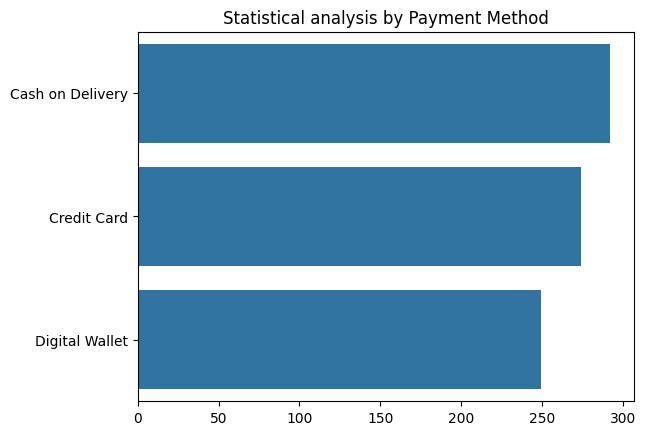

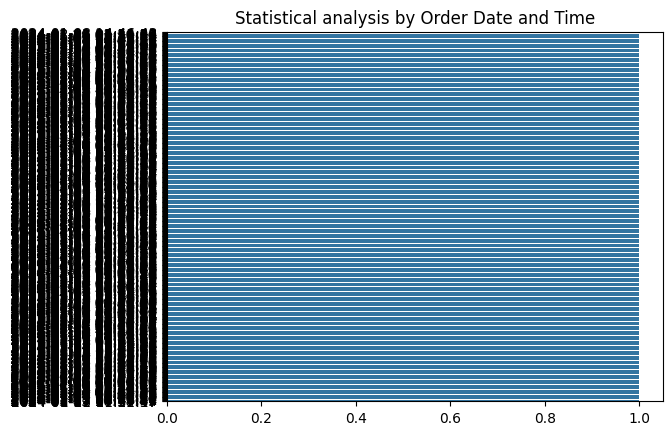

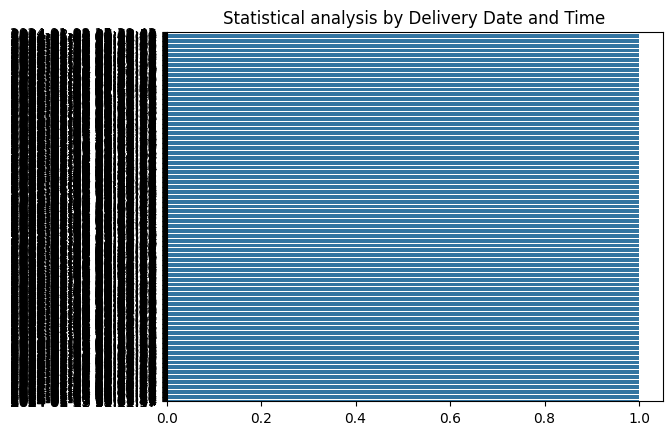

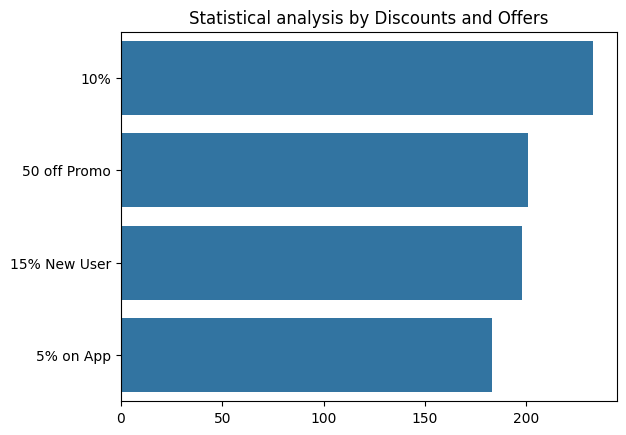

In [39]:
# cycle to plot bar chart for each categorical column
for col in categorical_vars:
    plot_barchart(dataset, col)

This graph shows the density of specific values ​​in columns. Discounts that all customers took advantage of.

Pie Chart - Analysis of relative frequencies

In [40]:
# function to plot pie chart for relative frequencies in 1 categorical column
def plot_piechart(dataset, col):
    # count the #samples for each categogy
    results = dataset[col].value_counts()
    # calculate the relative frequencies
    total_samples = results.sum()
    rel_freq = results/total_samples
    sbn.set_style("whitegrid")
    plt.figure(figsize=(6,6))
    plt.pie(rel_freq.values.tolist(), labels = rel_freq.index.tolist(), autopct='%1.1f%%')
    plt.title("Relative frequency analysis by " + col)
    plt.show()

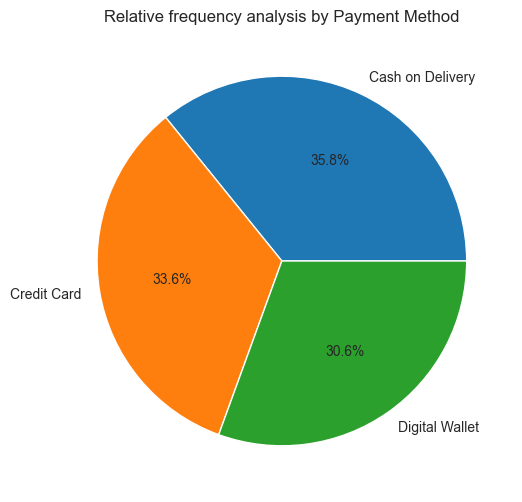

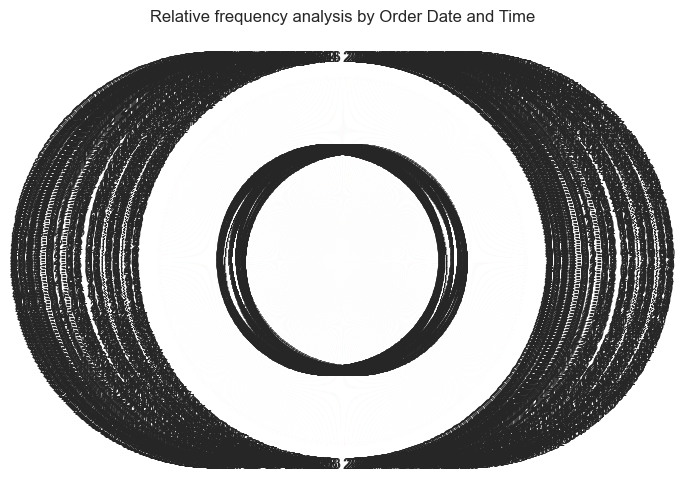

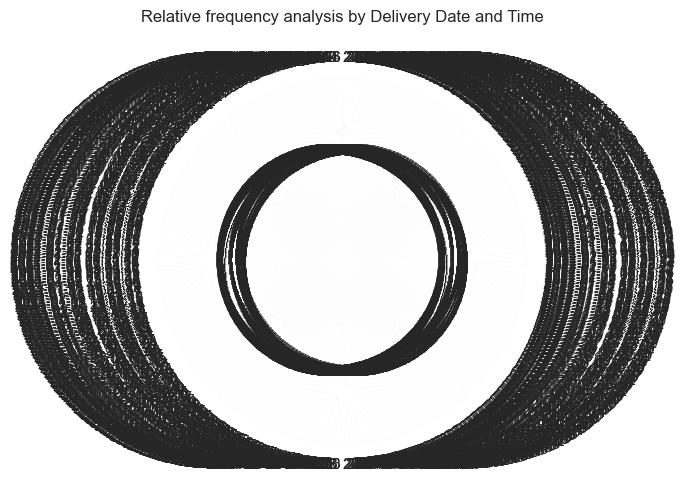

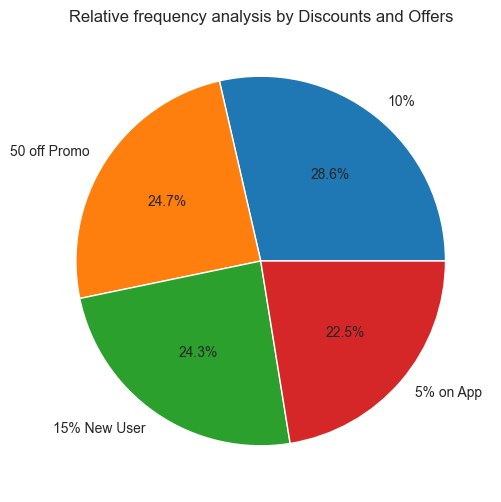

In [41]:
# cycle to plot pie chart for each categorical column
for col in categorical_vars:
    plot_piechart(dataset, col)

The graph shows data in the form of a pie chart what percentage of buyers took advantage of a specific discount.

Statistical Analysis for subgroups 

In [42]:
# create groups organized by sex and income
group_PaymentMethod_DiscountAndOffers = dataset.groupby(["Payment Method", "Discounts and Offers"]).size().reset_index(name = "samples")
print(group_PaymentMethod_DiscountAndOffers)

      Payment Method Discounts and Offers  samples
0   Cash on Delivery                  10%       83
1   Cash on Delivery         15% New User       77
2   Cash on Delivery            5% on App       62
3   Cash on Delivery         50 off Promo       70
4        Credit Card                  10%       81
5        Credit Card         15% New User       68
6        Credit Card            5% on App       54
7        Credit Card         50 off Promo       71
8     Digital Wallet                  10%       69
9     Digital Wallet         15% New User       53
10    Digital Wallet            5% on App       67
11    Digital Wallet         50 off Promo       60


In [43]:
# function to plot absolute frequencies for groups
def plot_absfreq_groups(group, g1, g2):
    sbn.barplot(data = group, x = g1, y = "samples", hue = g2, palette = "pastel")
    plt.xlabel('Payment Method')
    plt.ylabel('Absolute Frequencies')
    plt.title('Bar Chart of Absolute Frequencies by Method and Discounts')
    plt.tight_layout()
    plt.show()

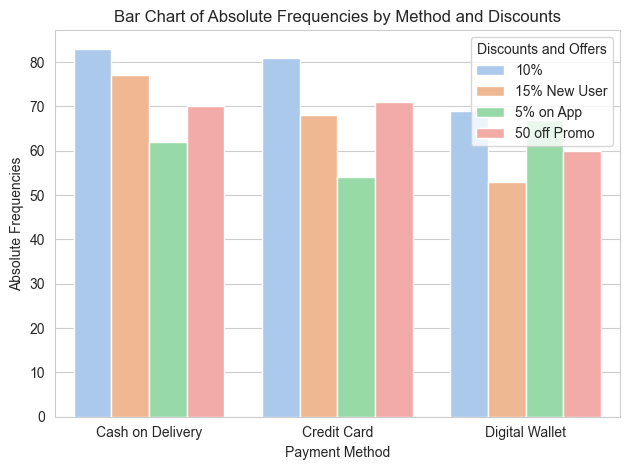

In [44]:
plot_absfreq_groups(group_PaymentMethod_DiscountAndOffers, "Payment Method", "Discounts and Offers")

The graph allows you to visually evaluate how payment methods compare with the frequency of their use depending on the discount categories. You can see which methods are more popular at different discount levels.

In [46]:
# function to plot relative frequencies for groups
def plot_relfreq_groups(group, g1, g2):
    labels = group[g1] + " with discount " + group[g2]
    sizes = group["samples"]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.axis('equal')
    plt.title('Pie Chart of Relative Frequencies by Payment Method and Discount')
    plt.show()

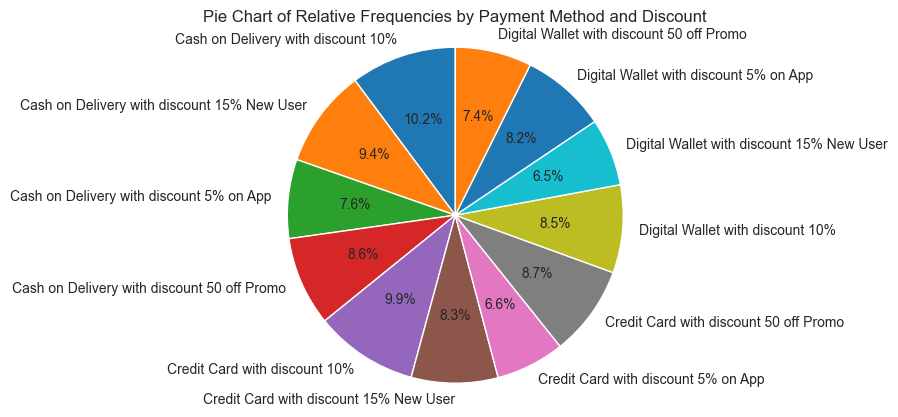

In [47]:
plot_relfreq_groups(group_PaymentMethod_DiscountAndOffers, "Payment Method", "Discounts and Offers")


This graph, in the form of a pie chart, shows the distribution of customers by payment method and discount used.